# Hybrid attack

### Load results 

In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from IPython.display import display
from itertools import product
from Graph import Graph


# parameters 

sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid")

log_columns = ["expe","attack_type","optim","alpha","beta","gamma","graph1_prop","common_prop",
        "iter_number","epsilon","impossible_edges","reconstructed_edges","unknown_edges",
        "TP","FP","TN","FN","G2_distance","time"]

graph_stats = {
    "netscience": (379, 914, 14662),
    "bio-diseasome": (516, 1188, 21332),
    "cora": (2485, 5069, 113964),
    "polblogs": (1490, 16715, 2716480),
    "cora_logs": (2485, 5069),
    "email" : (143, 623)
}



# Results

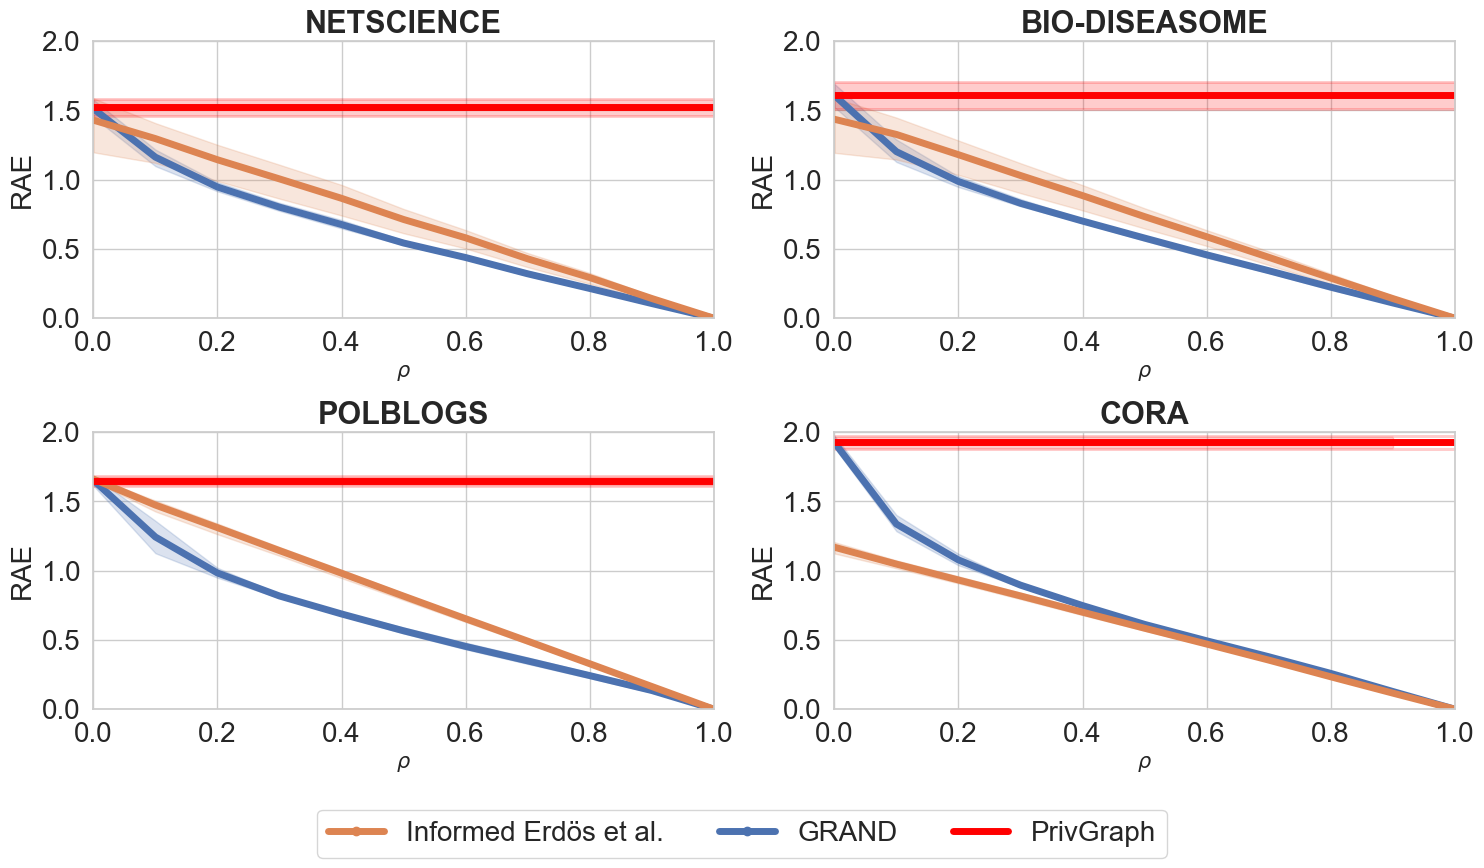

In [7]:
dataset_names = ["netscience","bio-diseasome", "polblogs", "cora"]
from matplotlib.lines import Line2D


fig = plt.figure(figsize=(15, 8))
colors = color=sns.color_palette()

for i, dataset_name in enumerate(dataset_names):
    result = pd.read_csv(f"logs/benchmark_with_privgraph/{dataset_name}.csv")
    result.columns = ["expe","attack_type","optim","alpha","beta","gamma","graph1_prop","common_prop","iter_number","epsilon","impossible_edges","reconstructed_edges","unknown_edges","RAE_dp", "RAE", "CNE_dp", "CNE","time"]

    mean_RAE = result["RAE_dp"].mean()
    std_RAE = result["RAE_dp"].std()
    mean_CNE = result["CNE_dp"].mean()
    
    erdos_et_al = result[result["attack_type"] == "H"]
    us = result[result["attack_type"].str.startswith("DDH")]
    
    ax = fig.add_subplot(2, int(len(dataset_names) / 2), i+1)
    sns.lineplot(us, x="graph1_prop", y="RAE", ax=ax, color=colors[0], linewidth=5)
    sns.lineplot(erdos_et_al, x="graph1_prop", y="RAE", ax=ax, color=colors[1], linewidth=5)
    ax.axhline(mean_RAE, color='red', linestyle='-', linewidth=5)
    ax.fill_between(us["graph1_prop"], mean_RAE - std_RAE, mean_RAE + std_RAE, color='red', alpha=0.2)
    ax.set_ylim(0, 2)
    ax.set_xlim(0, 1)
    ax.set_xlabel(r'$\rho$', fontdict={'fontsize': 15})
    ax.set_ylabel("RAE", fontdict={'fontsize': 20})
    ax.tick_params(axis='both', which='major', labelsize=20)


    ax.set_title(f'{dataset_name.upper()}' , fontdict={'fontsize': 22, 'fontweight': 'bold'})
    

custom_legend = [
        Line2D([0], [0], color=colors[1], marker='o', linestyle='-', label="Informed Erdös et al.", linewidth=5),
        Line2D([0], [0], color=colors[0], marker='o', linestyle='-', label="GRAND", linewidth=5),
        Line2D([0], [0], color='red', linestyle='-', label=r"PrivGraph", linewidth=5),
    ]

fig.legend(handles=custom_legend, loc='lower center', fontsize=20, ncol=3, bbox_to_anchor=(0.5, -0.1))
plt.tight_layout()
plt.show()